# Apple Watch에서 심박수(Heart Rate[b/m]) 시계열분석

* Data set: Health_Data.csv (Apple Watch2)

* Date: 23rd July 2019

* Written By Haesung Lee

* <a href="https://raw.githubusercontent.com/leehaesung/My_Heart_Rate_For_Time_Series_Analysis/master/02_Codes/Convert_HealthKit_Data.py">Python Coverter (from xml to csv)</a>

* <a href="https://github.com/leehaesung/My_Heart_Rate_For_Time_Series_Analysis/blob/master/HowToConvertFromXML2CSV.md">How to export & convert HealthKit data from iPhone/Apple Watch</a>

 ![HeartReate](https://www.wareable.com/media/images/2018/01/apple-watch-diagram-1514903846-sh5z-column-width-inline.jpg)
 ![Simul](https://www.apple.com/newsroom/ca/images/product/apps/standard/Apple-Watch-ECG-app-12062018_big.gif.large.gif)

In [1]:
# create and evaluate an updated autoregressive model
import matplotlib as plot
from pandas import read_csv
from matplotlib import pyplot
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
#
# Data sets

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#view basic stats information on data
series.describe()

count    538.000000
mean     119.260223
std       21.900723
min       62.000000
25%      103.000000
50%      116.000000
75%      132.000000
max      196.000000
Name: HeartRate, dtype: float64

In [3]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 

#view top 10 records
series.head(10)

Finish
2017-07-06    107
2017-07-07     74
2017-07-08     74
2017-07-12     62
2017-07-13    105
2017-07-14    118
2017-07-15    127
2017-07-16    104
2017-07-17    122
2017-07-18    156
Name: HeartRate, dtype: int64

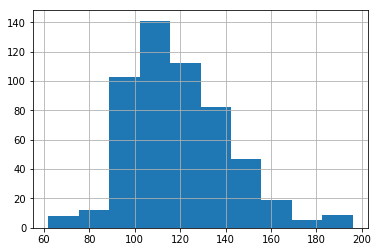

In [4]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.hist()
pyplot.show()

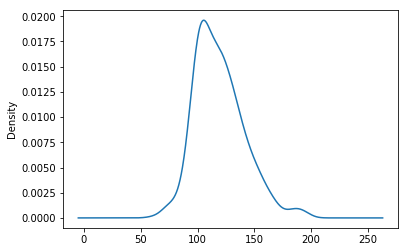

In [5]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(kind='kde')
pyplot.show()

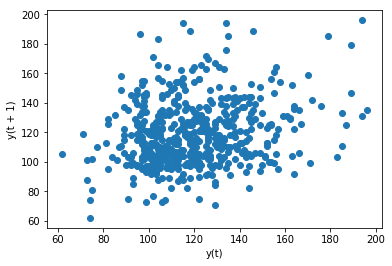

In [6]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

In [7]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

            t       t+1
t    1.000000  0.221386
t+1  0.221386  1.000000


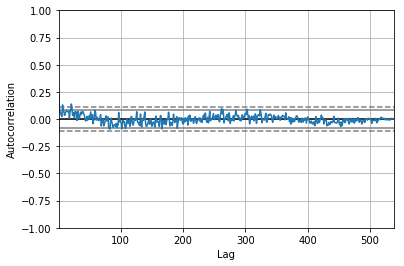

In [8]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

{sensor:143.000000,prediction:106.405402}
{sensor:114.000000,prediction:124.903725}
{sensor:89.000000,prediction:115.485607}
{sensor:115.000000,prediction:101.666869}
{sensor:88.000000,prediction:112.992877}
{sensor:158.000000,prediction:105.301198}
{sensor:154.000000,prediction:117.775253}
{sensor:126.000000,prediction:117.016921}
{sensor:135.000000,prediction:125.581334}
{sensor:126.000000,prediction:114.155368}
{sensor:92.000000,prediction:124.675834}
{sensor:118.000000,prediction:115.872551}
{sensor:119.000000,prediction:110.207120}
{sensor:162.000000,prediction:119.942899}
{sensor:129.000000,prediction:122.763644}
{sensor:167.000000,prediction:109.149012}
{sensor:126.000000,prediction:127.821549}
{sensor:115.000000,prediction:111.601279}
{sensor:104.000000,prediction:127.515251}
{sensor:183.000000,prediction:109.035810}
{sensor:103.000000,prediction:129.339748}
{sensor:111.000000,prediction:114.662897}
{sensor:97.000000,prediction:116.788191}
{sensor:103.000000,prediction:98.65222

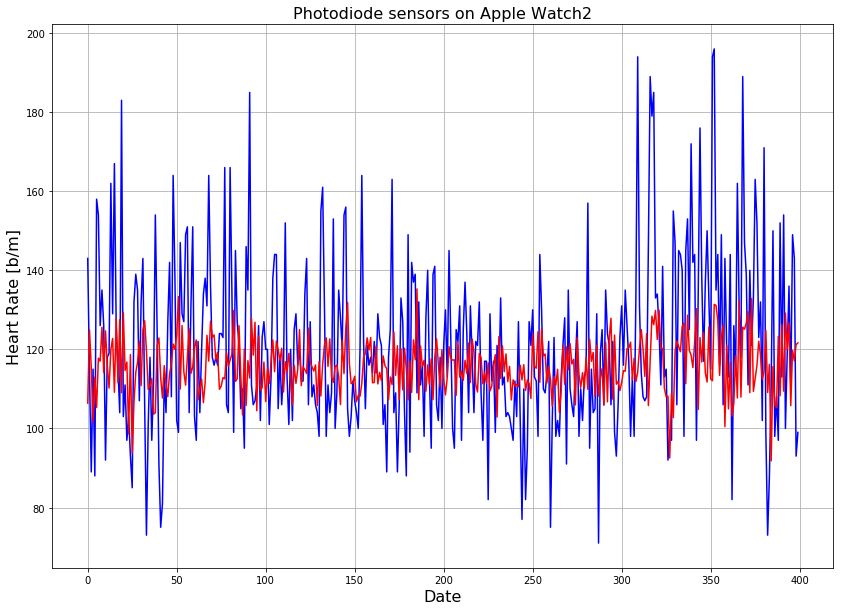

In [9]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

# load dataset
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
testLength = 400;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (obs, yhat))
rmse = sqrt(mean_squared_error(test, predictions))

print('{TestRMSE:%.3f}' % rmse)

plt.figure(figsize=(14,10))
plt.plot(test, c = 'blue')
plt.plot(predictions, c =  'red')
plt.title("Photodiode sensors on Apple Watch2",fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Heart Rate [b/m]",fontsize=16)
plt.grid()
plt.show()

Test RMSE: 27.315


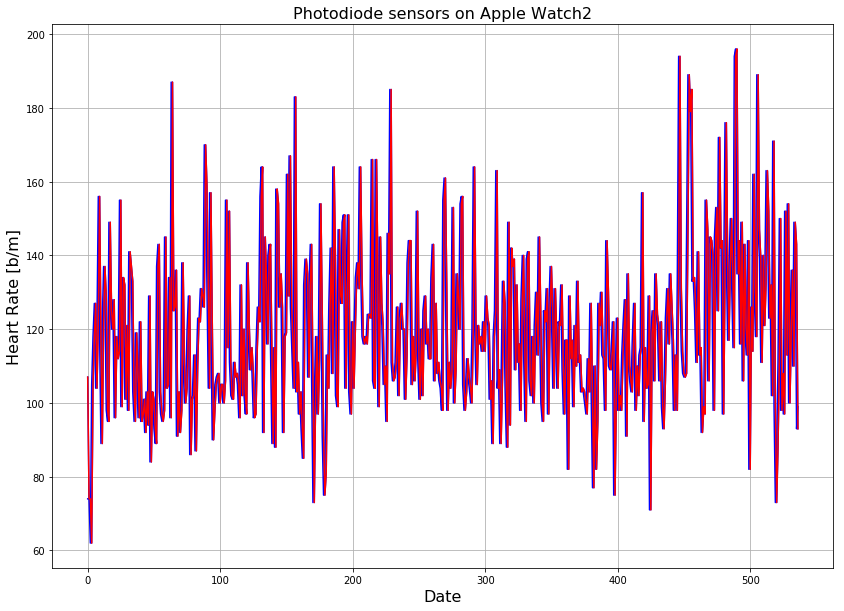

In [10]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

# load dataset
series = read_csv('data/Health_Data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
testLength = 537;
train, test = X[1:len(X)-testLength], X[len(X)-testLength:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# plot predictions
plt.figure(figsize=(14,10))
plt.plot(test, c = 'blue')
plt.plot(predictions, c =  'red')
plt.title("Photodiode sensors on Apple Watch2",fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Heart Rate [b/m]",fontsize=16)
plt.grid()
plt.show()

# References
 * [How to export and import your Health data](https://www.idownloadblog.com/2015/06/10/how-to-export-import-health-data/?fbclid=IwAR0_qXo1ZwE0ZtSxVksTAu9g82d9uzVkRoVRkZFQDPFzeHq8wxTn77-CHZo)
 * [Understand Your Apple Watch's Heart Rate Numbers ](https://vitals.lifehacker.com/understand-your-apple-watchs-heart-rate-numbers-1831767054)

In [ ]:
# END